In [1]:
# 데이터 출처: https://archive.ics.uci.edu/dataset/222/bank+marketing
# Github 출처: https://github.com/uci-ml-repo/ucimlrepo

#기본 모듈 불러오기 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# warning을 모두 무시하는 것은 좋지 않으나 과제 수행을 쉽게할 수 있도록 무시설정
import warnings
warnings.filterwarnings(action='ignore')

## 문제1: 라이브러리를 통해 데이터 불러오기
- 다음코드는 데이터를 불러오고 df 변수명에 저장하는 코드입니다.
- github 문서를 읽고 데이터를 요청하여 로컬환경에 저장해보세요

In [2]:
#%pip install -U ucimlrepo

In [3]:
'''문제 시작'''
from ucimlrepo import fetch_ucirepo

# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 

df = pd.concat([X,y], axis=1)

df.to_csv('./bank_marketing.csv', index=False)
'''문제 끝'''
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no


## 데이터 전처리 & EDA 간단히

In [4]:
#데이터 불러오기 
df = pd.read_csv('./bank_marketing.csv')

# 제공받은 데이터를 train, test로 분리
X = df.drop(columns = ['y'])
y = df[['y']]

# 학습과 평가를 위해 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= 42)
numeric_col = ['age','balance','day_of_week','duration','campaign','pdays','previous']
category_col = ['job','marital','education','default','housing','loan','contact','month','poutcome']

#분리된 데이터 차원 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33908, 16) (11303, 16) (33908, 1) (11303, 1)


In [5]:
X_train.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,33908.000000,33688,33908,32522,33908,33908.000000,33908,33908,24180,33908.000000,33908,33908.000000,33908.000000,33908.000000,33908.000000,6153
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure
freq,NaN,7369,20445,17376,33306,NaN,18891,28471,22000,NaN,10310,NaN,NaN,NaN,NaN,3645
mean,40.907957,NaN,NaN,NaN,NaN,1362.457709,NaN,NaN,NaN,15.825233,NaN,258.473015,2.759555,40.024979,0.582635,NaN
std,10.620338,NaN,NaN,NaN,NaN,3052.176471,NaN,NaN,NaN,8.339007,NaN,258.936344,3.094060,100.018015,2.445884,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,74.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,451.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1432.000000,NaN,NaN,NaN,21.000000,NaN,318.000000,3.000000,-1.000000,0.000000,NaN


<수치형 변수 시각화>
- balance: average yearly balance, 연간 평균 잔액
- day_of_week: last contact day of the week
- duration: last contact duration, in **seconds (numeric)**. Important note: this attribute highly affects the output target (e.g., **if duration=0 then y='no'**). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact), 이번 캠패인 동안 이 고객에게 컨택한 횟수
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; **-1 means client was not previously contacted**), 이전 캠페인을 마지막으로 연락한 후 경과한 일수
- previous: number of contacts performed before this campaign and for this client

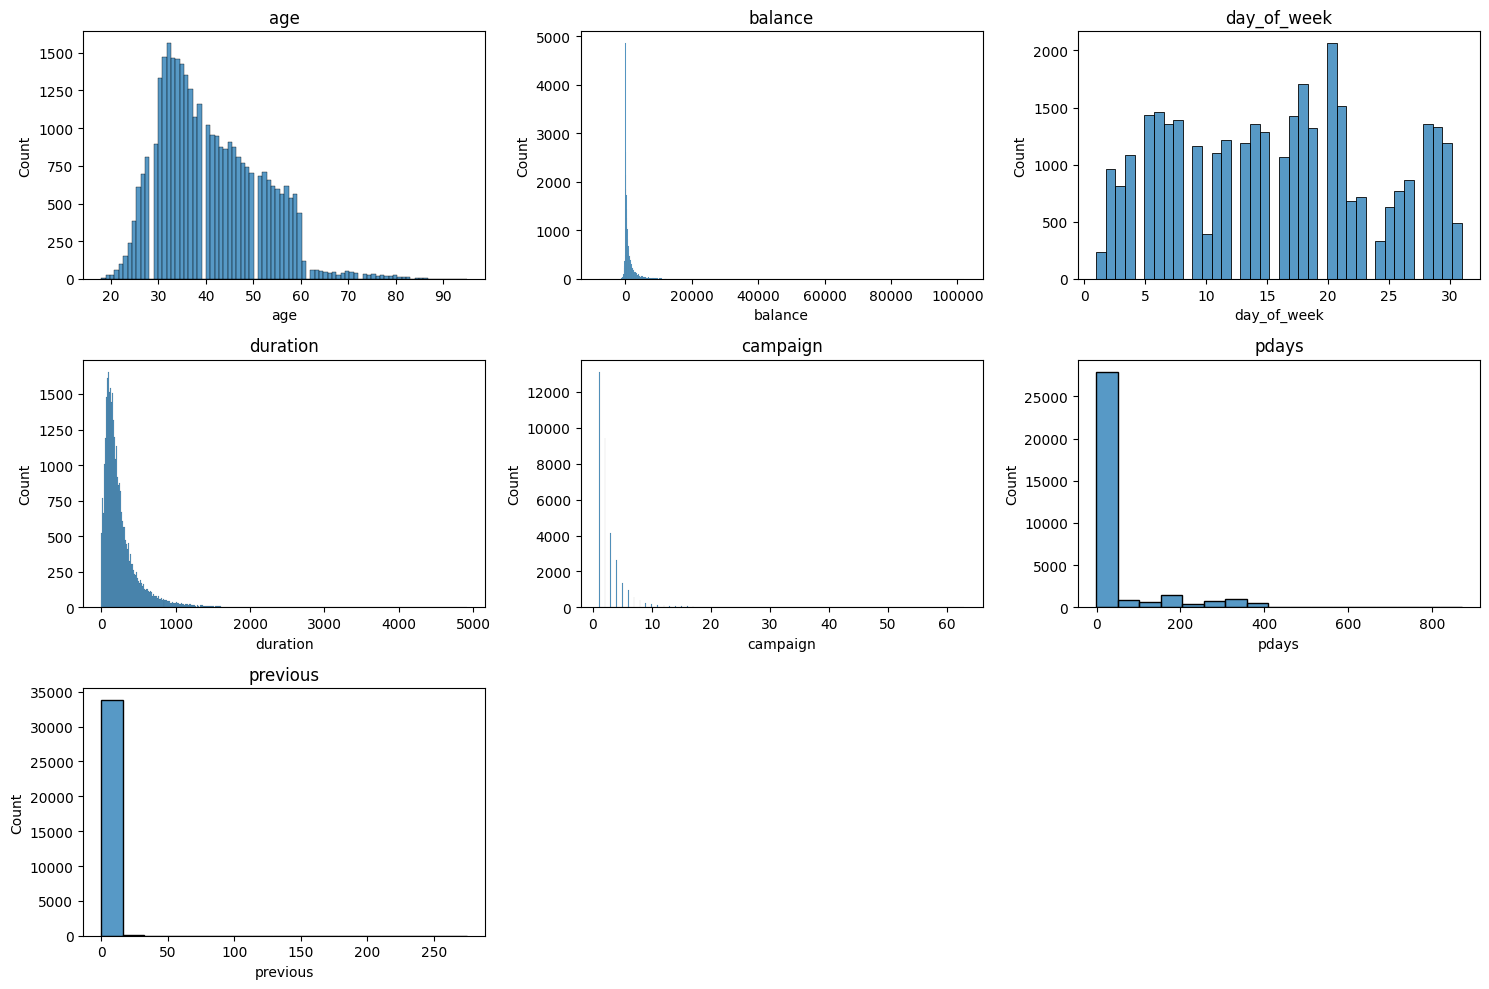

In [6]:
#수치형 변수 시각화
def get_3_hist(data:pd.DataFrame, columns:list):
    """ 데이터와 컬럼을 전달하면 히스토그램을 3개씩 출력해주는 함수

    Args:
        data (pd.DataFrame): 데이터프레임
        columns (list): 컬럼 리스트
    """
    plt.figure(figsize=(15, 5 * (len(columns) // 3)))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(len(columns) // 3 + (len(columns) % 3 > 0), 3, i + 1)
        # 히스토그램 그리기
        sns.histplot(data[col])
        plt.title(col)

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()
get_3_hist(X_train, numeric_col)

In [7]:
# 이상치가 많은 컬럼에 대해서 로그스케일 적용

#balance 값 보정
balance_min = abs(min(X_train['balance'].min(), X_test['balance'].min()))
X_train['balance'] = X_train['balance'] + balance_min
X_test['balance'] = X_test['balance'] + balance_min


# 로그스케일 적용
for col in ['duration','balance','previous']:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])

In [8]:
X_train.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,40.907957,9.118624,15.825233,5.172125,2.759555,40.024979,0.225184
std,10.620338,0.214213,8.339007,0.922256,3.094060,100.018015,0.533092
min,18.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,8.998878,8.000000,4.644391,1.000000,-1.000000,0.000000
50%,39.000000,9.044404,16.000000,5.198497,2.000000,-1.000000,0.000000
75%,48.000000,9.153982,21.000000,5.765191,3.000000,-1.000000,0.000000
max,95.000000,11.609571,31.000000,8.500861,63.000000,871.000000,5.620401


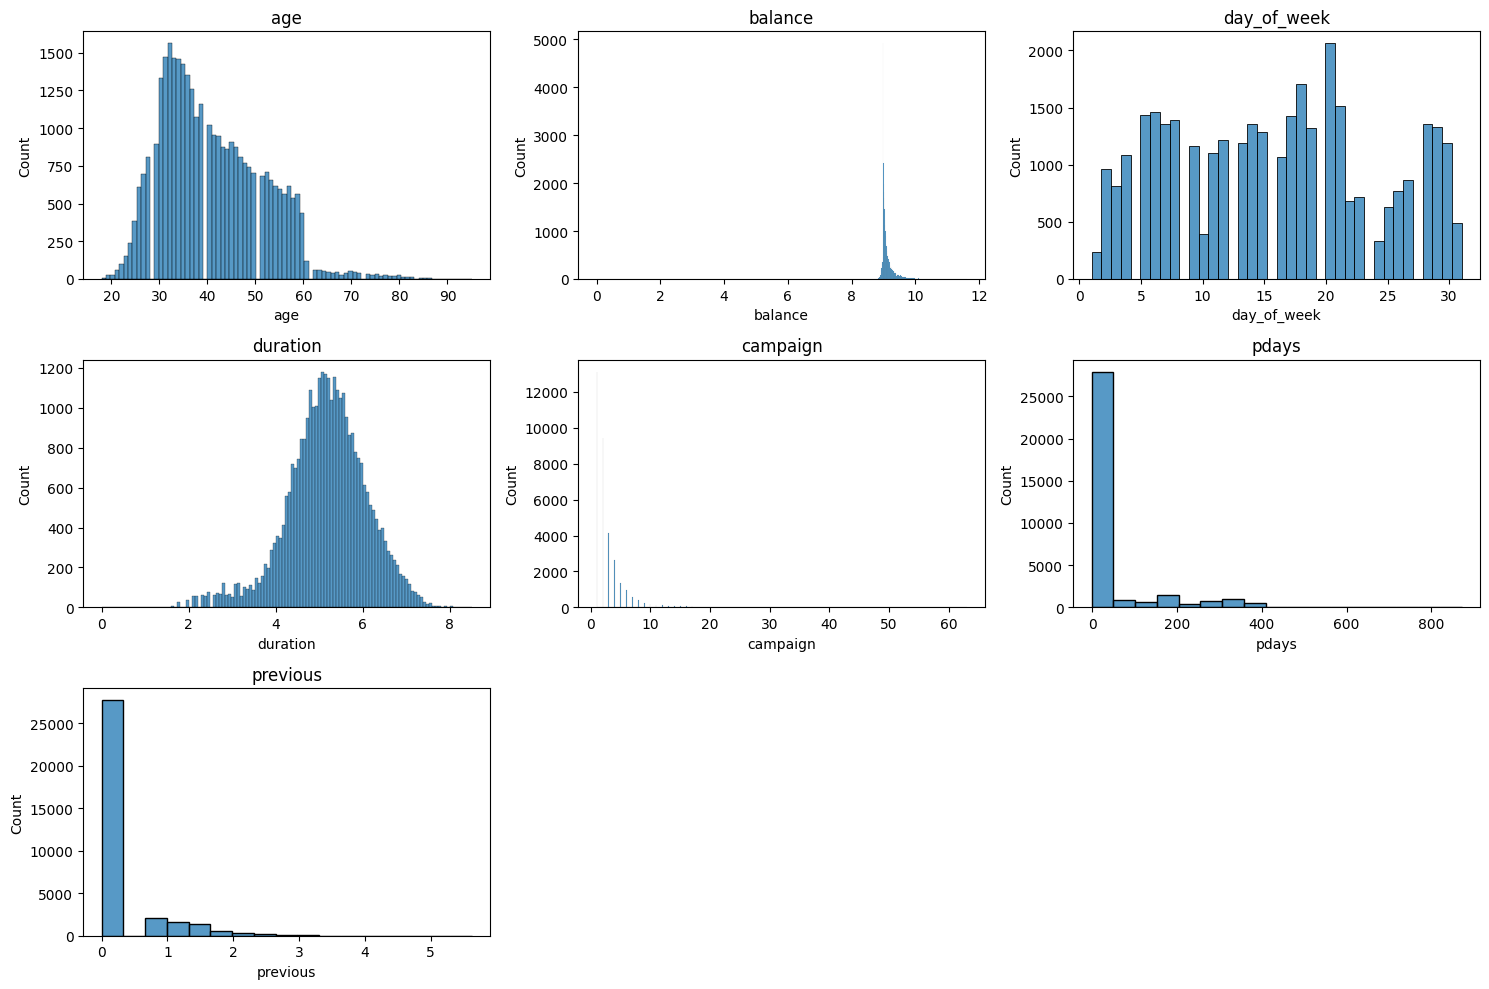

In [9]:
#로그스케일 변환 후 시각화
get_3_hist(X_train, numeric_col)

## 문제 2: Y 변수 인코딩 적용하기 
- Y 라벨을 no,yes를 사용자 정의함수와 apply를 이용하여 0,1로 인코딩 하세요
- 함수명은 get_binary로 설정하세요.
- Pandas docs: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [10]:
'''문제 시작'''

def get_binary(x):
    """
    주어진 문자열 x가 'no'일 경우 0을 반환하고, 그렇지 않을 경우 1을 반환합니다.
    이 함수는 일반적으로 두 가지 범주(예: 'yes'와 'no')를 가진 데이터를 이진 형식(0과 1)으로 변환하는 데 사용됩니다.

    Args:
        x (str): 변환할 문자열. 'no' 또는 그 외의 값을 가질 수 있습니다.
    Returns:
        int: 문자열 x가 'no'일 경우 0, 그렇지 않을 경우 1을 반환합니다.
    """
    # 이부분을 작성해주세요
    if x=='no':
        return 0
    else: 
        return 1
    
# y_train 데이터 인코딩 코드
y_train['y'] = y_train['y'].apply(get_binary)

# y_test 데이터 인코딩코드
y_test['y'] = y_test['y'].apply(get_binary)


'''문제 끝'''
#잘 적용되었는지 확인
display(y_train[:10])

,y
24915,0
11794,0
1279,0
913,0
5554,0
24126,1
38658,0
5469,0
14012,0
15788,0


In [11]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
24915,58,management,married,tertiary,no,8.989694,yes,no,cellular,18,nov,5.583496,1,188,0.693147,failure
11794,47,services,divorced,secondary,no,9.024854,no,no,NaN,20,jun,4.158883,1,-1,0.000000,NaN
1279,35,management,single,tertiary,no,9.084437,yes,no,NaN,8,may,4.406719,1,-1,0.000000,NaN
913,34,admin.,divorced,secondary,no,9.064968,yes,no,NaN,7,may,5.648974,2,-1,0.000000,NaN
5554,35,admin.,single,secondary,no,9.000976,yes,no,NaN,23,may,5.225747,4,-1,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,41,management,single,tertiary,no,9.119650,yes,yes,NaN,9,jun,5.963579,12,-1,0.000000,NaN
26216,40,services,single,secondary,no,9.166075,yes,no,cellular,20,nov,6.006353,1,-1,0.000000,NaN
15941,36,admin.,single,secondary,no,8.992433,yes,no,cellular,22,jul,4.356709,5,-1,0.000000,NaN
16952,45,blue-collar,married,secondary,no,8.999496,yes,no,cellular,25,jul,4.595120,1,-1,0.000000,NaN


## 문제3: 간단한 모델링 & 평가함수 생성하기
- 평가하기 위한 다음 함수를 완성하세요
- 필요한 모듈율 불러오고, 학습시키고, 결과를 저장하세요
    - y_pred_train : 훈련데이터 예측결과 변수
    - y_pred_test: 테스트데이터 예측결과 변수

In [12]:
X_train['duration']

24915    5.583496
11794    4.158883
1279     4.406719
913      5.648974
5554     5.225747
           ...   
10010    5.963579
26216    6.006353
15941    4.356709
16952    4.595120
34781    5.429346
Name: duration, Length: 33908, dtype: float64

In [13]:
def get_score(train:pd.DataFrame,  test:pd.DataFrame, x_var_list:list):
    """ train과 test 데이터와 X변수 컬럼을 받아 평가지표를 내는 함수입니다.

    Args:
        train (pd.DataFrame): train 데이터프레임
        test (pd.DataFrame): test 데이터프레임
        x_var_list (list): 모델링에 사용할 변수 리스트
    """
    #외부 전달인자를 내부변수에 할당
    X_train = train 
    X_test = test

    #일부 컬럼만 가져오기
    X_train = X_train[x_var_list]
    X_test = X_test[x_var_list]
    
    '''문제 시작'''
    #모듈불러오기
    from sklearn.metrics import accuracy_score, f1_score
    from sklearn.linear_model import LogisticRegression
    
    #모델가져오기 & 학습하기
    model = LogisticRegression()
    lr_model = model.fit(X_train, y_train)
    
    # 학습하여 결과 저장
    y_pred_train = lr_model.predict(X_train)
    y_pred_test = lr_model.predict(X_test)
    
    '''문제 끝'''
    
    #평가표 생성
    result = pd.DataFrame({'acc' : [accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)],
                            'f1_score' : [f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)]},
                            index = ['train','test'])
    
    display(result.round(2))

# duration 변수만 사용하여 결과내기
get_score(X_train, X_test, ['duration'])

,acc,f1_score
train,0.89,0.23
test,0.89,0.20


## 문제4: 모델링 수행하기
- 전체 변수를 가공하여 예측모델링을 수행하는 함수 get_numeric_sc를 완성해보세요

In [14]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
24915,58,management,married,tertiary,no,8.989694,yes,no,cellular,18,nov,5.583496,1,188,0.693147,failure
11794,47,services,divorced,secondary,no,9.024854,no,no,NaN,20,jun,4.158883,1,-1,0.000000,NaN
1279,35,management,single,tertiary,no,9.084437,yes,no,NaN,8,may,4.406719,1,-1,0.000000,NaN
913,34,admin.,divorced,secondary,no,9.064968,yes,no,NaN,7,may,5.648974,2,-1,0.000000,NaN
5554,35,admin.,single,secondary,no,9.000976,yes,no,NaN,23,may,5.225747,4,-1,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,41,management,single,tertiary,no,9.119650,yes,yes,NaN,9,jun,5.963579,12,-1,0.000000,NaN
26216,40,services,single,secondary,no,9.166075,yes,no,cellular,20,nov,6.006353,1,-1,0.000000,NaN
15941,36,admin.,single,secondary,no,8.992433,yes,no,cellular,22,jul,4.356709,5,-1,0.000000,NaN
16952,45,blue-collar,married,secondary,no,8.999496,yes,no,cellular,25,jul,4.595120,1,-1,0.000000,NaN


In [15]:
def get_numeric_sc(X_train:pd.DataFrame, X_test:pd.DataFrame):
    """데이터를 전달받아 수치형 변수 스케일링하는 함수

    Args:
        X_train (pd.DataFrame): train 데이터프레임
        X_test (pd.DataFrame):  test 데이터프레임

    Returns:
        pd.DataFrame, pd.DataFrame: train, test 데이터프레임
    """
    # 수치형변수
    # age, balance, day_of_week, duration, campaign, pdays,previous
    
    #StandardScaler 적용할 변수 리스트
    sc_col = ['pdays','previous']
    #MinMaxScaler 적용할 변수 리스트
    mm_col = ['age','duration','day_of_week','balance','campaign']
    
    '''문제 시작'''
    #모듈 불러오기
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    
    #모델 가져오기
    std_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    #train, test 데이터변환(Standard Scaler이용)
    X_train[sc_col] = std_scaler.fit_transform(X_train[sc_col])
    X_test[sc_col] = std_scaler.transform(X_test[sc_col])
    
    #train, test 데이터변환(MinMax Scaler이용)
    X_train[mm_col] = minmax_scaler.fit_transform(X_train[mm_col])
    X_test[mm_col] = minmax_scaler.transform(X_test[mm_col])
    
    
    '''문제 끝'''
    return X_train, X_test

X_train, X_test = get_numeric_sc(X_train, X_test)

In [16]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
24915,0.519481,management,married,tertiary,no,0.774335,yes,no,cellular,0.566667,nov,0.656815,0.000000,1.479505,0.877841,failure
11794,0.376623,services,divorced,secondary,no,0.777363,no,no,NaN,0.633333,jun,0.489231,0.000000,-0.410182,-0.422417,NaN
1279,0.220779,management,single,tertiary,no,0.782495,yes,no,NaN,0.233333,may,0.518385,0.000000,-0.410182,-0.422417,NaN
913,0.207792,admin.,divorced,secondary,no,0.780818,yes,no,NaN,0.200000,may,0.664518,0.016129,-0.410182,-0.422417,NaN
5554,0.220779,admin.,single,secondary,no,0.775307,yes,no,NaN,0.733333,may,0.614731,0.048387,-0.410182,-0.422417,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.298701,management,single,tertiary,no,0.785529,yes,yes,NaN,0.266667,jun,0.701527,0.177419,-0.410182,-0.422417,NaN
26216,0.285714,services,single,secondary,no,0.789527,yes,no,cellular,0.633333,nov,0.706558,0.000000,-0.410182,-0.422417,NaN
15941,0.233766,admin.,single,secondary,no,0.774571,yes,no,cellular,0.700000,jul,0.512502,0.064516,-0.410182,-0.422417,NaN
16952,0.350649,blue-collar,married,secondary,no,0.775179,yes,no,cellular,0.800000,jul,0.540548,0.000000,-0.410182,-0.422417,NaN


In [17]:
# 수치형 변수를 이용한 학습&평가
get_score(X_train, X_test, numeric_col)

,acc,f1_score
train,0.89,0.25
test,0.88,0.22


In [18]:
def get_category(X_train:pd.DataFrame, X_test:pd.DataFrame):
    """ 데이터를 전달받아 범주형 변수 더미화하는 함수

    Args:
        X_train (pd.DataFrame): train 데이터프레임
        X_test (pd.DataFrame):  test 데이터프레임

    Returns:
        pd.DataFrame, pd.DataFrmae, list: train, test 데이터프레임, 더미화된 컬럼
    """
    
    #범주형변수
    # 'job','marital','education','default','housing','loan','contact','month','poutcome'
    
    #범주형 컬럼 더미화 하기
    X_train_dummies = pd.get_dummies(X_train[category_col])
    X_test_dummies = pd.get_dummies(X_test[category_col])
    
    # 더미화한 변수를 기존 데이터셋에 합치기
    X_train = pd.concat([X_train, X_train_dummies], axis = 1)
    X_test = pd.concat([X_test, X_test_dummies], axis = 1)
    
    return X_train, X_test, X_train_dummies.columns.to_list()
    

X_train, X_test, col_dummies = get_category(X_train,X_test)

In [19]:
len(col_dummies)

40

In [20]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
24915,0.519481,management,married,tertiary,no,0.774335,yes,no,cellular,0.566667,...,False,False,False,False,True,False,False,True,False,False
11794,0.376623,services,divorced,secondary,no,0.777363,no,no,NaN,0.633333,...,False,True,False,False,False,False,False,False,False,False
1279,0.220779,management,single,tertiary,no,0.782495,yes,no,NaN,0.233333,...,False,False,False,True,False,False,False,False,False,False
913,0.207792,admin.,divorced,secondary,no,0.780818,yes,no,NaN,0.200000,...,False,False,False,True,False,False,False,False,False,False
5554,0.220779,admin.,single,secondary,no,0.775307,yes,no,NaN,0.733333,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.298701,management,single,tertiary,no,0.785529,yes,yes,NaN,0.266667,...,False,True,False,False,False,False,False,False,False,False
26216,0.285714,services,single,secondary,no,0.789527,yes,no,cellular,0.633333,...,False,False,False,False,True,False,False,False,False,False
15941,0.233766,admin.,single,secondary,no,0.774571,yes,no,cellular,0.700000,...,True,False,False,False,False,False,False,False,False,False
16952,0.350649,blue-collar,married,secondary,no,0.775179,yes,no,cellular,0.800000,...,True,False,False,False,False,False,False,False,False,False


In [21]:
# 범주형 변수를 이용한 학습&평가
get_score(X_train,X_test, col_dummies)

,acc,f1_score
train,0.89,0.27
test,0.89,0.29


In [22]:
# 수치형 + 범주형 변수 모두 사용하여 평가
get_score(X_train, X_test, col_dummies + numeric_col)

,acc,f1_score
train,0.9,0.45
test,0.9,0.46


## 심화 (강의엔 없는내용)
- accuracy score는 높은 반면 f1-score는 낮습니다. 이걸로 볼때 y값이 편향되어있음을 알 수 있습니다.
    - 또한, f1-score는 train에는 100% 확률로 예측한 반면, test는 50% 정도로 터무니 없이 낮습니다. train 데이터에 과적합이 의심됩니다. 

- 이진분류(0,1) 문제는 기본적으로 한쪽으로 찍으면 50%의 확률이 나오기 때문에 50%의 결과는 기본만 못합니다.(비용, 시간 투입고려)
    - 게다가 파이차트로 확인해보니(하단) 대출거절이 기본적인 고객의 패턴입니다.(약 88%)
- 이를 극복하기 위해 y값이 편향되어 있는 문제 해결을 위해 y=1 인 데이터값을 증강하는  oversampling 방법을 수행해보겠습니다

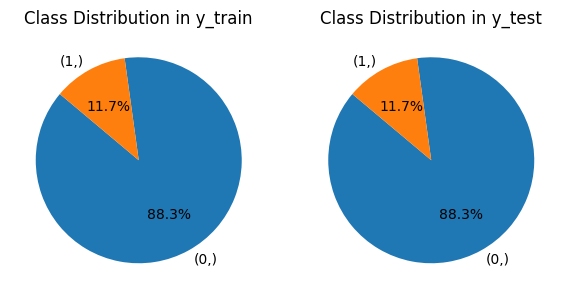

In [23]:
#train, test 데이터의 라벨 수 세기 

y_train_counts = y_train.value_counts()
y_test_counts = y_test.value_counts()

datasets = [(y_train, 'Class Distribution in y_train'),
            (y_test, 'Class Distribution in y_test')]

# subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

# 반복문을 사용하여 각 데이터셋의 클래스 분포 시각화
for i, (dataset, title) in enumerate(datasets):
    value_counts = dataset.value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(title)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [24]:
#데이터다시 불러오기
df = pd.read_csv('./bank_marketing.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= 42)

#y 라벨 변경
y_train['y'] = y_train['y'].apply(get_binary)
y_test['y'] = y_test['y'].apply(get_binary)

#처음 순서와 다르게 범주형 먼저 인코딩 하여 숫자로 변경
#이유: SMOTE 알고리즘이 기본적으로 수치형변수에 적용되기 때문
X_train, X_test, col_dummies = get_category(X_train,X_test)

# 사용된 범주형 변수는 삭제 
X_train = X_train.drop(columns = category_col)
X_test = X_test.drop(columns = category_col)

- SMOTE 알고리즘을 통한 oversampling 적용

In [25]:
#최초 1회 실행 후 주석처리
#%pip install imbalanced-learn

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)

- 하기 내용은 이전과 같음

In [27]:
#balance의 값은 음수가 있기 때문에 최소값을 보정함
balance_min = abs(min(X_train['balance'].min(), X_test['balance'].min()))
X_train['balance'] = X_train['balance'] + balance_min
X_test['balance'] = X_test['balance'] + balance_min

# 로그스케일 적용
for col in ['balance','previous']:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])
    
# 수치형 변수 변환
X_train, X_test = get_numeric_sc(X_train, X_test)

In [28]:
get_score(X_train, X_test, col_dummies + numeric_col)

,acc,f1_score
train,0.94,0.94
test,0.94,0.94


# (선택, 서술형)

- 위 모델링은 데이터 전처리 등 개선할 점이 있습니다. 어떤 부분을 개선하면 좋을까요? 

데이터 전처리 단계와 모델 성능 평가 지표에서 개선할 점은 아래와 같다 생각합니다.

1. **pdays 이상치(-1)을 0으로 보정**

    분석하는 데이터셋은 '새로운 direct marketing campaigns (phone calls)을 통한 term deposit을 예측'하기 위한 목적이므로, 이전 캠페인으로부터 어느정도 이미 경과된 데이터이다.

    pdays 피쳐는 '이전 캠페인을 마지막으로 연락한 후 경과된 일수'이므로, 0인 경우에 이전 캠페인이 끝난 당일 연락을 했다는 의미는 성립할 수 없다.

    실제 데이터에도 0값은 없으며, -1 값인 경우 연락을 하지 않았다는 의미이다.

    -1값은 35420개로 데이터에서 대다수를 차지하고 있으므로 제거할 수 없고, 이상치가 많으므로 log를 취해주면 더 좋은 성능을 얻을 수 있다.

    그렇기 때문에 -1 값을 0으로 치환해주었다. (0부터 존재하므로, log1p를 적용해주어도 inf 값이 생기지 않아 standard 스케일러 적용에 문제가 없다.)
    

2. **duration과 balance를 Standard Scaler 적용**


    최대최소정규화를 적용해주는 duration과 balance 피쳐들을 스탠다드 정규화로 바꾸어 주었다.

    절대적인 수치값보다는 전체 고객의 평균값과 표준편차값으로 분산을 1로 만들어주어, 
    
    해당 고객이 얼마나 잔액을 유지하는지 또는 상품 설명 관련 통화에 관심이 있는지를 반영하는 것이 적절하다 판단하였다.

3. 성능 평가 지표로 precision과 recall 추가

    아래와 같은 이유로, 조화평균 (f1 score) 외에도 직관적으로 FP와 FN을 확인하면 좋을 것 같아 추가하였습니다.
    - precision(FP): 전화 마케팅의 경우에는 상품 가입으로 **예측한 고객에게 마케팅을 하였는데 실제로 이러한 마케팅을 좋아하지 않는 고객**이라면 (예: 짧은 duration) 고객에게 부정적인 경험을 유발할 수 있음
    - recall(NP): 전화 마케팅의 경우에는 상품 가입으로 **실제로 상품 가입 확률이 높은 고객이지만 마케팅이 적절히 적용되지 않는다면** 매출 손실로 이어질 수 있음

추가적으로, 결측치 처리 방법과 카테고리 컬럼을 라벨링하는 방법([commit 4d045b4](https://github.com/bellepoque7/sparta_ml/blob/4d045b44871af31e8d950a296375c991a8533a08/A02_%EC%B5%9C%EC%98%81%EC%95%84.ipynb))을 실험해보았으나 dummy를 적용하는 방식이 가장 성능이 좋았습니다.

결측치가 새로 생성되는 피쳐가 모두 False로 적용되며 데이터의 손실없이 보존되므로 이러한 결과를 보이는 것 같습니다.

또한, education의 경우 결측치가 많지 않아 제거를 해보았으나 ([commit aa3adc6](https://github.com/bellepoque7/sparta_ml/blob/aa3adc6881a83cb625571a164920f4d712e4f2db/A02_%EC%B5%9C%EC%98%81%EC%95%84.ipynb)) train 성능이 오른반면 test 성능에서는 차이가 크지 않아, 과적합이 우려되어 적용하지 않았습니다.



## 제안하는 개선 내용을 적용한 코드

In [29]:
#데이터 불러오기 
df = pd.read_csv('./bank_marketing.csv')

# 제공받은 데이터를 train, test로 분리
X = df.drop(columns = ['y'])
y = df[['y']]

# 학습과 평가를 위해 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= 42)
numeric_col = ['age','balance','day_of_week','duration','campaign','pdays','previous']
category_col = ['job','marital','education','default','housing','loan','contact','month','poutcome']

#분리된 데이터 차원 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33908, 16) (11303, 16) (33908, 1) (11303, 1)


In [30]:
X.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [31]:
X.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [32]:
X.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar', nan,
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [33]:
X.education.unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [34]:
X.contact.unique()

array([nan, 'cellular', 'telephone'], dtype=object)

In [35]:
X.poutcome.unique()

array([nan, 'failure', 'other', 'success'], dtype=object)

<수치형 변수 시각화>
- balance: average yearly balance, 연간 평균 잔액
- day_of_week: last contact day of the week
- duration: last contact duration, in **seconds (numeric)**. Important note: this attribute highly affects the output target (e.g., **if duration=0 then y='no'**). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact), 이번 캠패인 동안 이 고객에게 컨택한 횟수
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; **-1 means client was not previously contacted**), 이전 캠페인을 마지막으로 연락한 후 경과한 일수
- previous: number of contacts performed before this campaign and for this client

In [36]:
df[df.duration=='no']

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y


In [37]:
df[df.pdays==-1]

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,NaN,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes


In [38]:
df[df.pdays==0]

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y


In [39]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

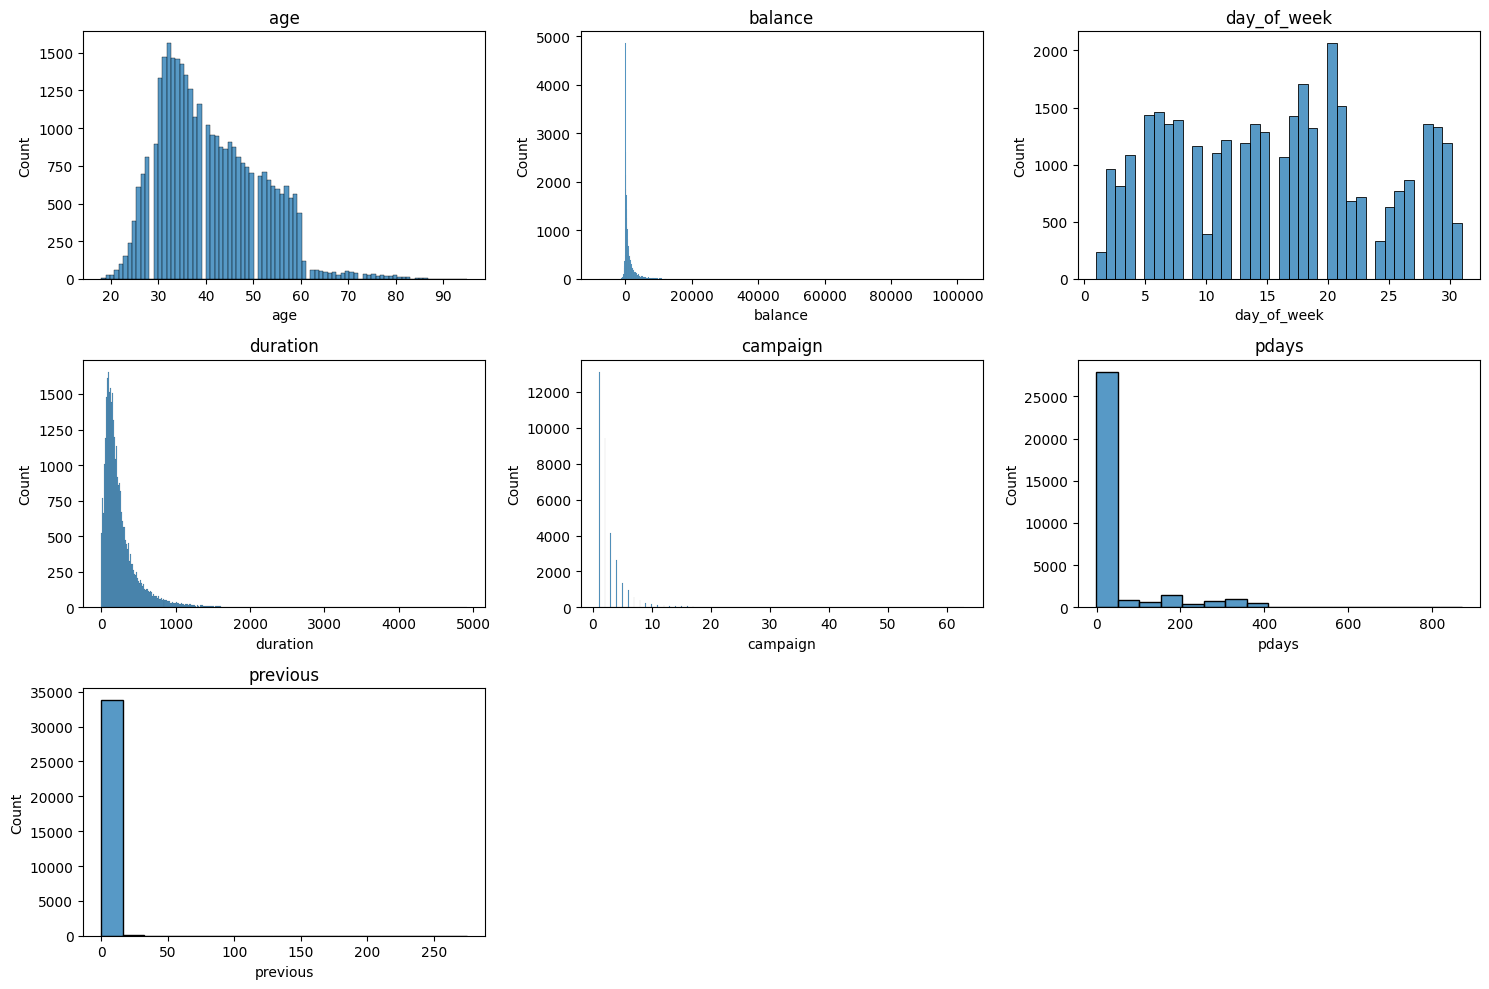

In [40]:
get_3_hist(X_train, numeric_col)

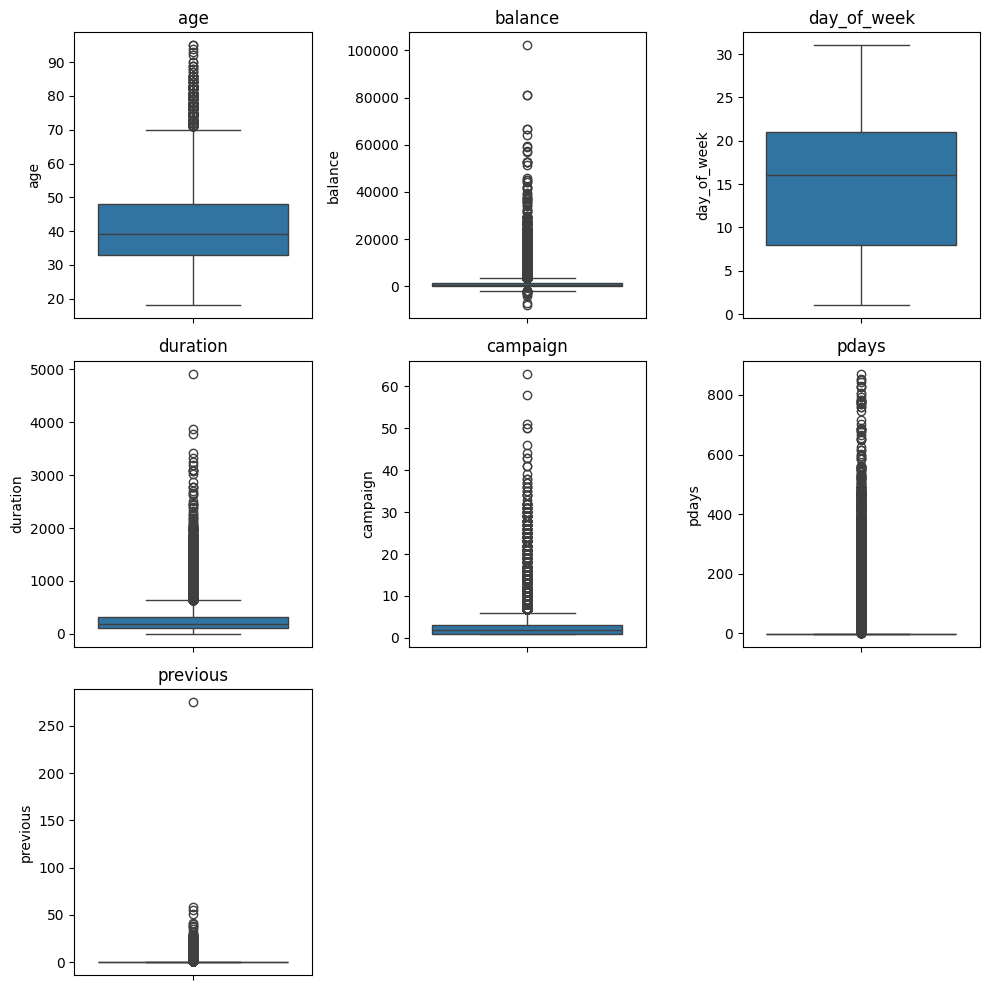

In [41]:
#수치형 변수 시각화
def get_3_box(data:pd.DataFrame, columns:list):
    """ 데이터와 컬럼을 전달하면 박스플롯을 3개씩 출력해주는 함수

    Args:
        data (pd.DataFrame): 데이터프레임
        columns (list): 컬럼 리스트
    """
    plt.figure(figsize=(10, 5 * (len(columns) // 3)))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(len(columns) // 3 + (len(columns) % 3 > 0), 3, i + 1)
        # 히스토그램 그리기
        sns.boxplot(data[col])
        plt.title(col)

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()
get_3_box(X_train, numeric_col)

**1. pdays 이상치(-1)을 0으로 보정**

In [42]:
# 이상치가 많은 'duration','balance','previous', 'pdays' 컬럼에 대해서 로그스케일 적용

#balance 값 보정
# train의 최솟값이 -8019값인 상태, 양의 정수만을 갖도록 보정
balance_min = abs(min(X_train['balance'].min(), X_test['balance'].min()))
X_train['balance'] = X_train['balance'] + balance_min
X_test['balance'] = X_test['balance'] + balance_min

# 1. pdays 이상치(-1)을 0으로 보정
# pdays에는 컨택하지 않았음을 -1 값으로 표시 -> 0 값은 존재하지 않으므로 0값으로 대체
# 데이터셋은 새로운 direct marketing campaigns (phone calls)을 위해 term deposit을 예측하기 위한 데이터이므로, 이전 캠페인으로부터 이미 경과된 데이터
# pdays는 '이전 캠페인을 마지막으로 연락한 후 경과한 일수'이므로 0인 경우, 이전 캠패인이 끝난 당일 연락을 했다는 의미이므로 성립할 수 없음
X_train['pdays'] = X_train['pdays'].apply(lambda x: 0 if x==-1 else x)
X_test['pdays'] = X_test['pdays'].apply(lambda x: 0 if x==-1 else x)


#로그스케일 적용
# np.log 사용시, 0(최솟값)에서 inf 값을 갖게 되므로, log1p를 사용해서 x+1값에 log를 취하도록 함
for col in ['duration','balance','previous', 'pdays']:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])

In [43]:
X_train.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,40.907957,9.118624,15.825233,5.172125,2.759555,0.952064,0.225184
std,10.620338,0.214213,8.339007,0.922256,3.094060,2.043785,0.533092
min,18.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,8.998878,8.000000,4.644391,1.000000,0.000000,0.000000
50%,39.000000,9.044404,16.000000,5.198497,2.000000,0.000000,0.000000
75%,48.000000,9.153982,21.000000,5.765191,3.000000,0.000000,0.000000
max,95.000000,11.609571,31.000000,8.500861,63.000000,6.770789,5.620401


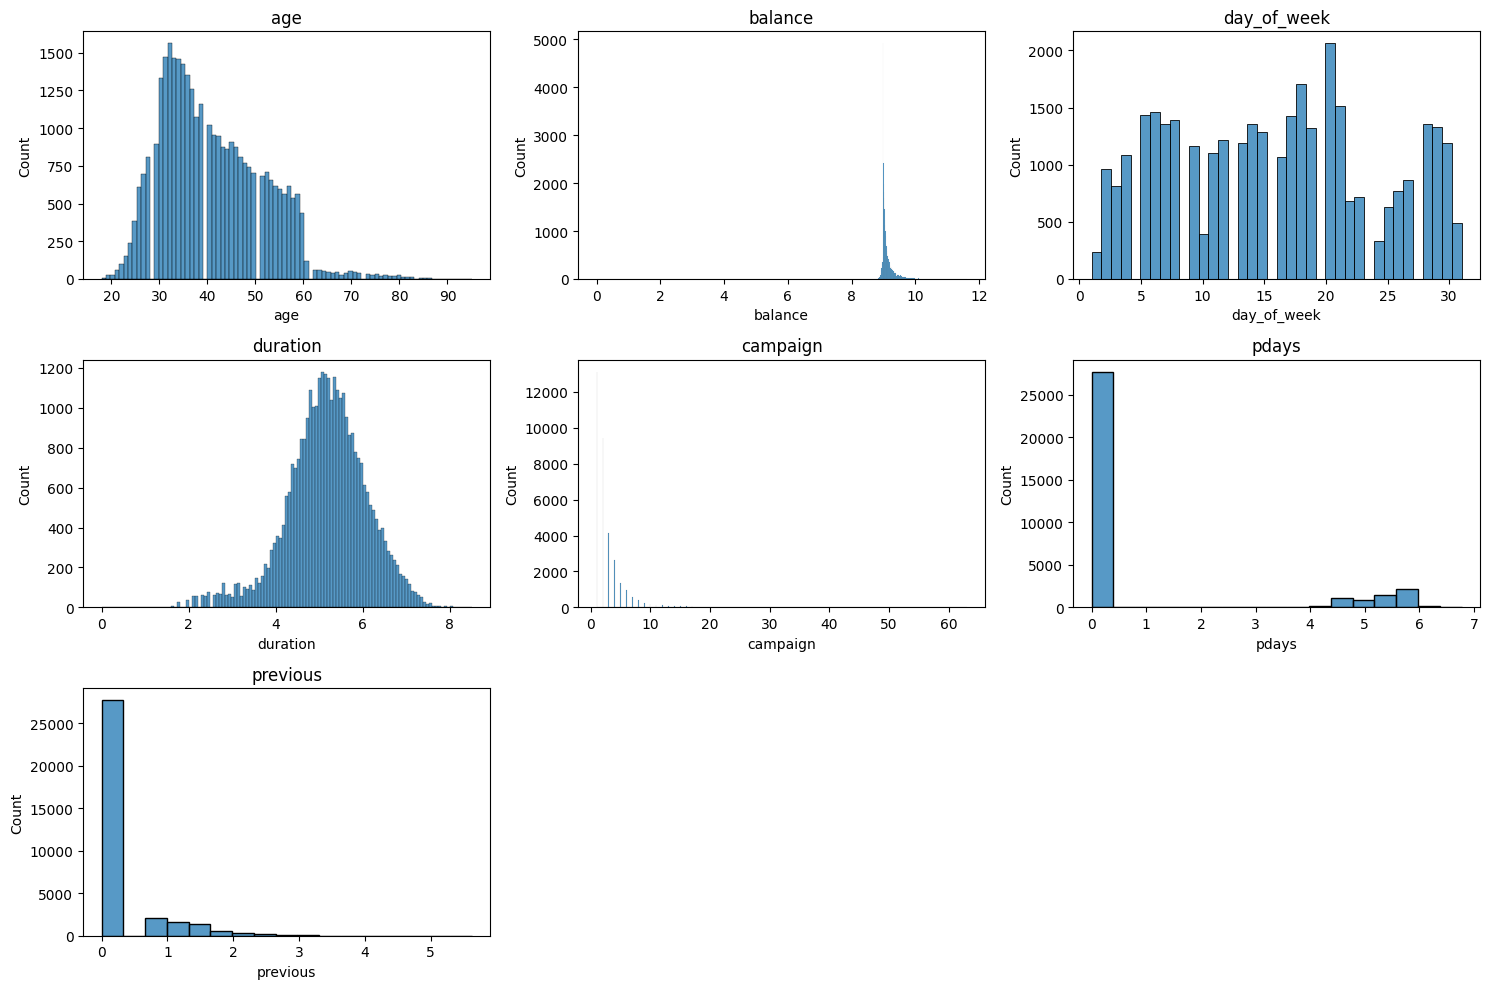

In [44]:
get_3_hist(X_train, numeric_col)

In [45]:
def get_binary(x):
    """
    주어진 문자열 x가 'no'일 경우 0을 반환하고, 그렇지 않을 경우 1을 반환합니다.
    이 함수는 일반적으로 두 가지 범주(예: 'yes'와 'no')를 가진 데이터를 이진 형식(0과 1)으로 변환하는 데 사용됩니다.

    Args:
        x (str): 변환할 문자열. 'no' 또는 그 외의 값을 가질 수 있습니다.
    Returns:
        int: 문자열 x가 'no'일 경우 0, 그렇지 않을 경우 1을 반환합니다.
    """
    # 이부분을 작성해주세요
    if x=='no':
        return 0
    else: 
        return 1
    
# y_train 데이터 인코딩 코드
y_train['y'] = y_train['y'].apply(get_binary)

# y_test 데이터 인코딩코드
y_test['y'] = y_test['y'].apply(get_binary)

#잘 적용되었는지 확인
display(y_train[:10])

,y
24915,0
11794,0
1279,0
913,0
5554,0
24126,1
38658,0
5469,0
14012,0
15788,0


In [46]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
24915,58,management,married,tertiary,no,8.989694,yes,no,cellular,18,nov,5.583496,1,5.241747,0.693147,failure
11794,47,services,divorced,secondary,no,9.024854,no,no,NaN,20,jun,4.158883,1,0.000000,0.000000,NaN
1279,35,management,single,tertiary,no,9.084437,yes,no,NaN,8,may,4.406719,1,0.000000,0.000000,NaN
913,34,admin.,divorced,secondary,no,9.064968,yes,no,NaN,7,may,5.648974,2,0.000000,0.000000,NaN
5554,35,admin.,single,secondary,no,9.000976,yes,no,NaN,23,may,5.225747,4,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,41,management,single,tertiary,no,9.119650,yes,yes,NaN,9,jun,5.963579,12,0.000000,0.000000,NaN
26216,40,services,single,secondary,no,9.166075,yes,no,cellular,20,nov,6.006353,1,0.000000,0.000000,NaN
15941,36,admin.,single,secondary,no,8.992433,yes,no,cellular,22,jul,4.356709,5,0.000000,0.000000,NaN
16952,45,blue-collar,married,secondary,no,8.999496,yes,no,cellular,25,jul,4.595120,1,0.000000,0.000000,NaN


In [47]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression

def get_score(train:pd.DataFrame,  test:pd.DataFrame, x_var_list:list):
    """ train과 test 데이터와 X변수 컬럼을 받아 평가지표를 내는 함수입니다.

    Args:
        train (pd.DataFrame): train 데이터프레임
        test (pd.DataFrame): test 데이터프레임
        x_var_list (list): 모델링에 사용할 변수 리스트
    """
    #외부 전달인자를 내부변수에 할당
    X_train = train 
    X_test = test

    #일부 컬럼만 가져오기
    X_train = X_train[x_var_list]
    X_test = X_test[x_var_list]
    
    #모델가져오기 & 학습하기
    model = LogisticRegression()
    lr_model = model.fit(X_train, y_train)
    
    # 학습하여 결과 저장
    y_pred_train = lr_model.predict(X_train)
    y_pred_test = lr_model.predict(X_test)
    
    
    #평가표 생성
    result = pd.DataFrame({'acc' : [accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)],
                            'f1_score' : [f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)],
                            'recall':[recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test)],
                            'precision':[precision_score(y_train, y_pred_train), precision_score(y_test, y_pred_test)]
                            },
                            index = ['train','test'])
    
    display(result.round(4))

# duration 변수만 사용하여 결과내기
get_score(X_train, X_test, ['duration'])

,acc,f1_score,recall,precision
train,0.8891,0.2348,0.1454,0.6093
test,0.8863,0.2043,0.1248,0.5631


In [48]:
get_score(X_train, X_test, numeric_col)
# pdays에 log를 취한 경우, f1 score가 이전보다 상승 (이전 train 0.24 / test 0.23)

,acc,f1_score,recall,precision
train,0.8881,0.2731,0.1797,0.5681
test,0.8846,0.2454,0.1604,0.5222


**2. duration과 balance를 Standard Scaler 적용**

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def get_numeric_sc(X_train:pd.DataFrame, X_test:pd.DataFrame):
    """데이터를 전달받아 수치형 변수 스케일링하는 함수

    Args:
        X_train (pd.DataFrame): train 데이터프레임
        X_test (pd.DataFrame):  test 데이터프레임

    Returns:
        pd.DataFrame, pd.DataFrame: train, test 데이터프레임
    """
    # 수치형변수
    # age, balance, day_of_week, duration, campaign, pdays, previous
    
    #StandardScaler 적용할 변수 리스트
    sc_col = ['previous','pdays','duration', 'balance']
    #MinMaxScaler 적용할 변수 리스트
    mm_col = ['age','day_of_week','campaign']
    
    #모델 가져오기
    std_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    #train, test 데이터변환(Standard Scaler이용)
    X_train[sc_col] = std_scaler.fit_transform(X_train[sc_col])
    X_test[sc_col] = std_scaler.transform(X_test[sc_col])
    
    #train, test 데이터변환(MinMax Scaler이용)
    X_train[mm_col] = minmax_scaler.fit_transform(X_train[mm_col])
    X_test[mm_col] = minmax_scaler.transform(X_test[mm_col])
    
    return X_train, X_test

X_train, X_test = get_numeric_sc(X_train, X_test)

In [50]:
# 수치형 변수를 이용한 학습&평가
get_score(X_train, X_test, numeric_col)

,acc,f1_score,recall,precision
train,0.8884,0.2762,0.1820,0.5721
test,0.8850,0.2468,0.1611,0.5272


In [51]:
X_train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,33908.000000,33688,33908,32522,33908,3.390800e+04,33908,33908,24180,33908.000000,33908,3.390800e+04,33908.000000,3.390800e+04,3.390800e+04,6153
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure
freq,NaN,7369,20445,17376,33306,NaN,18891,28471,22000,NaN,10310,NaN,NaN,NaN,NaN,3645
mean,0.297506,NaN,NaN,NaN,NaN,-8.117136e-15,NaN,NaN,NaN,0.494174,NaN,4.832227e-16,0.028380,-3.059433e-17,-4.903474e-17,NaN
std,0.137926,NaN,NaN,NaN,NaN,1.000015e+00,NaN,NaN,NaN,0.277967,NaN,1.000015e+00,0.049904,1.000015e+00,1.000015e+00,NaN
min,0.000000,NaN,NaN,NaN,NaN,-4.256871e+01,NaN,NaN,NaN,0.000000,NaN,-5.608208e+00,0.000000,-4.658407e-01,-4.224173e-01,NaN
25%,0.194805,NaN,NaN,NaN,NaN,-5.590138e-01,NaN,NaN,NaN,0.233333,NaN,-5.722295e-01,0.000000,-4.658407e-01,-4.224173e-01,NaN
50%,0.272727,NaN,NaN,NaN,NaN,-3.464859e-01,NaN,NaN,NaN,0.500000,NaN,2.859564e-02,0.016129,-4.658407e-01,-4.224173e-01,NaN
75%,0.389610,NaN,NaN,NaN,NaN,1.650590e-01,NaN,NaN,NaN,0.666667,NaN,6.430701e-01,0.032258,-4.658407e-01,-4.224173e-01,NaN


In [52]:
def get_category(X_train:pd.DataFrame, X_test:pd.DataFrame):
    """ 데이터를 전달받아 범주형 변수 더미화하는 함수

    Args:
        X_train (pd.DataFrame): train 데이터프레임
        X_test (pd.DataFrame):  test 데이터프레임

    Returns:
        pd.DataFrame, pd.DataFrmae, list: train, test 데이터프레임, 더미화된 컬럼
    """
    
    #범주형변수
    # 'job','marital','education','default','housing','loan','contact','month','poutcome'
    
    #범주형 컬럼 더미화 하기
    X_train_dummies = pd.get_dummies(X_train[category_col])
    X_test_dummies = pd.get_dummies(X_test[category_col])
    
    # 더미화한 변수를 기존 데이터셋에 합치기
    X_train = pd.concat([X_train, X_train_dummies], axis = 1)
    X_test = pd.concat([X_test, X_test_dummies], axis = 1)
    
    return X_train, X_test, X_train_dummies.columns.to_list()
    

X_train, X_test, col_dummies = get_category(X_train,X_test)

In [53]:
len(col_dummies)

40

In [54]:
get_score(X_train, X_test, numeric_col + col_dummies)

,acc,f1_score,recall,precision
train,0.9034,0.4666,0.3610,0.6596
test,0.9039,0.4733,0.3691,0.6595


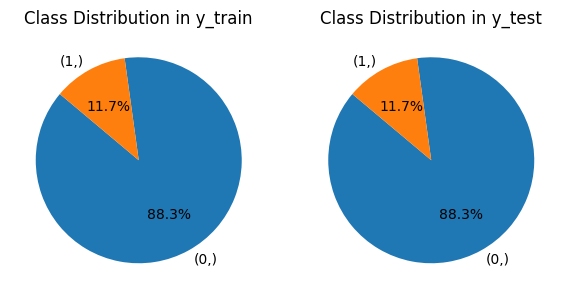

In [55]:
#train, test 데이터의 라벨 수 세기 

y_train_counts = y_train.value_counts()
y_test_counts = y_test.value_counts()

datasets = [(y_train, 'Class Distribution in y_train'),
            (y_test, 'Class Distribution in y_test')]

# subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

# 반복문을 사용하여 각 데이터셋의 클래스 분포 시각화
for i, (dataset, title) in enumerate(datasets):
    value_counts = dataset.value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(title)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [56]:
X_train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
count,33908.000000,33688,33908,32522,33908,3.390800e+04,33908,33908,24180,33908.000000,...,33908,33908,33908,33908,33908,33908,33908,33908,33908,33908
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,...,2,2,2,2,2,2,2,2,2,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,7369,20445,17376,33306,NaN,18891,28471,22000,NaN,...,28709,29914,33546,23598,30948,33348,33492,30263,32523,32785
mean,0.297506,NaN,NaN,NaN,NaN,-8.117136e-15,NaN,NaN,NaN,0.494174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.137926,NaN,NaN,NaN,NaN,1.000015e+00,NaN,NaN,NaN,0.277967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,-4.256871e+01,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.194805,NaN,NaN,NaN,NaN,-5.590138e-01,NaN,NaN,NaN,0.233333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.272727,NaN,NaN,NaN,NaN,-3.464859e-01,NaN,NaN,NaN,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.389610,NaN,NaN,NaN,NaN,1.650590e-01,NaN,NaN,NaN,0.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#데이터다시 불러오기
df = pd.read_csv('./bank_marketing.csv')

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= 42)

#y 라벨 변경
y_train['y'] = y_train['y'].apply(get_binary)
y_test['y'] = y_test['y'].apply(get_binary)

#처음 순서와 다르게 범주형 먼저 인코딩 하여 숫자로 변경
#이유: SMOTE 알고리즘이 기본적으로 수치형변수에 적용되기 때문
X_train, X_test, col_dummies = get_category(X_train,X_test)

# 사용된 범주형 변수는 삭제 
X_train = X_train.drop(columns = category_col)
X_test = X_test.drop(columns = category_col)

In [58]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)

In [59]:
#balance의 값은 음수가 있기 때문에 최소값을 보정함
balance_min = abs(min(X_train['balance'].min(), X_test['balance'].min()))
X_train['balance'] = X_train['balance'] + balance_min
X_test['balance'] = X_test['balance'] + balance_min

#pdays -1 값을 0으로 치환 (이후, log scale 적용)
X_train['pdays'] = X_train['pdays'].apply(lambda x: 0 if x==-1 else x)
X_test['pdays'] = X_test['pdays'].apply(lambda x: 0 if x==-1 else x)

# 로그스케일 적용
for col in ['duration','balance','previous', 'pdays']:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])
    
# 수치형 변수 변환 (StandardScaler, MinMaxScaler)
X_train, X_test = get_numeric_sc(X_train, X_test)

In [60]:
# 모든 category 컬럼에 dummy 적용하였을 때의 성능
get_score(X_train, X_test, X_train.columns.to_list())

,acc,f1_score,recall,precision
train,0.9421,0.9404,0.9136,0.9689
test,0.9429,0.9413,0.9157,0.9684
